# 06 - igraph *Demo* - CN&S Graph Analysis Tools Part 3
igraph emerge como una herramienta versátil y eficiente que ofrece una amplia 
gama de funcionalidades para el análisis de redes.

> Instalar `igraph` con `pip`

```shell
$ pip install igraph
```

> Instalar `igraph` con `conda`

```shell
$ conda install -c conda-forge python-igraph
```

> Importar biblioteca


In [1]:
import igraph as ig
print(ig.__version__)

0.9.9


In [3]:
import networkx as nx

In [40]:
user_network = nx.powerlaw_cluster_graph(10000, 2, 0.3)

In [41]:
# Converto from networkX to igraph
user_network = ig.Graph.from_networkx(user_network)
print("\nIgraph graph information")
print(user_network.summary())


Igraph graph information
IGRAPH U--- 10000 19996 -- 
+ attr: _nx_name (v)


In [42]:
density = user_network.density()
print("Density:", "{:.4f}".format(density))

avg_degree = sum(user_network.degree()) / user_network.vcount()
print("Avg. degree", "{:.4f}".format(avg_degree))

components = user_network.components()
print("Connected Components:", len(components))

cc = user_network.transitivity_avglocal_undirected()
print("Clustering Coefficient:", "{:.4f}".format(cc))

L = user_network.average_path_length()
print("Average Path Length :", "{:.4f}".format(L))

Density: 0.0004
Avg. degree 3.9992
Connected Components: 1
Clustering Coefficient: 0.2212
Average Path Length : 5.1072


330


<Figure size 432x288 with 0 Axes>

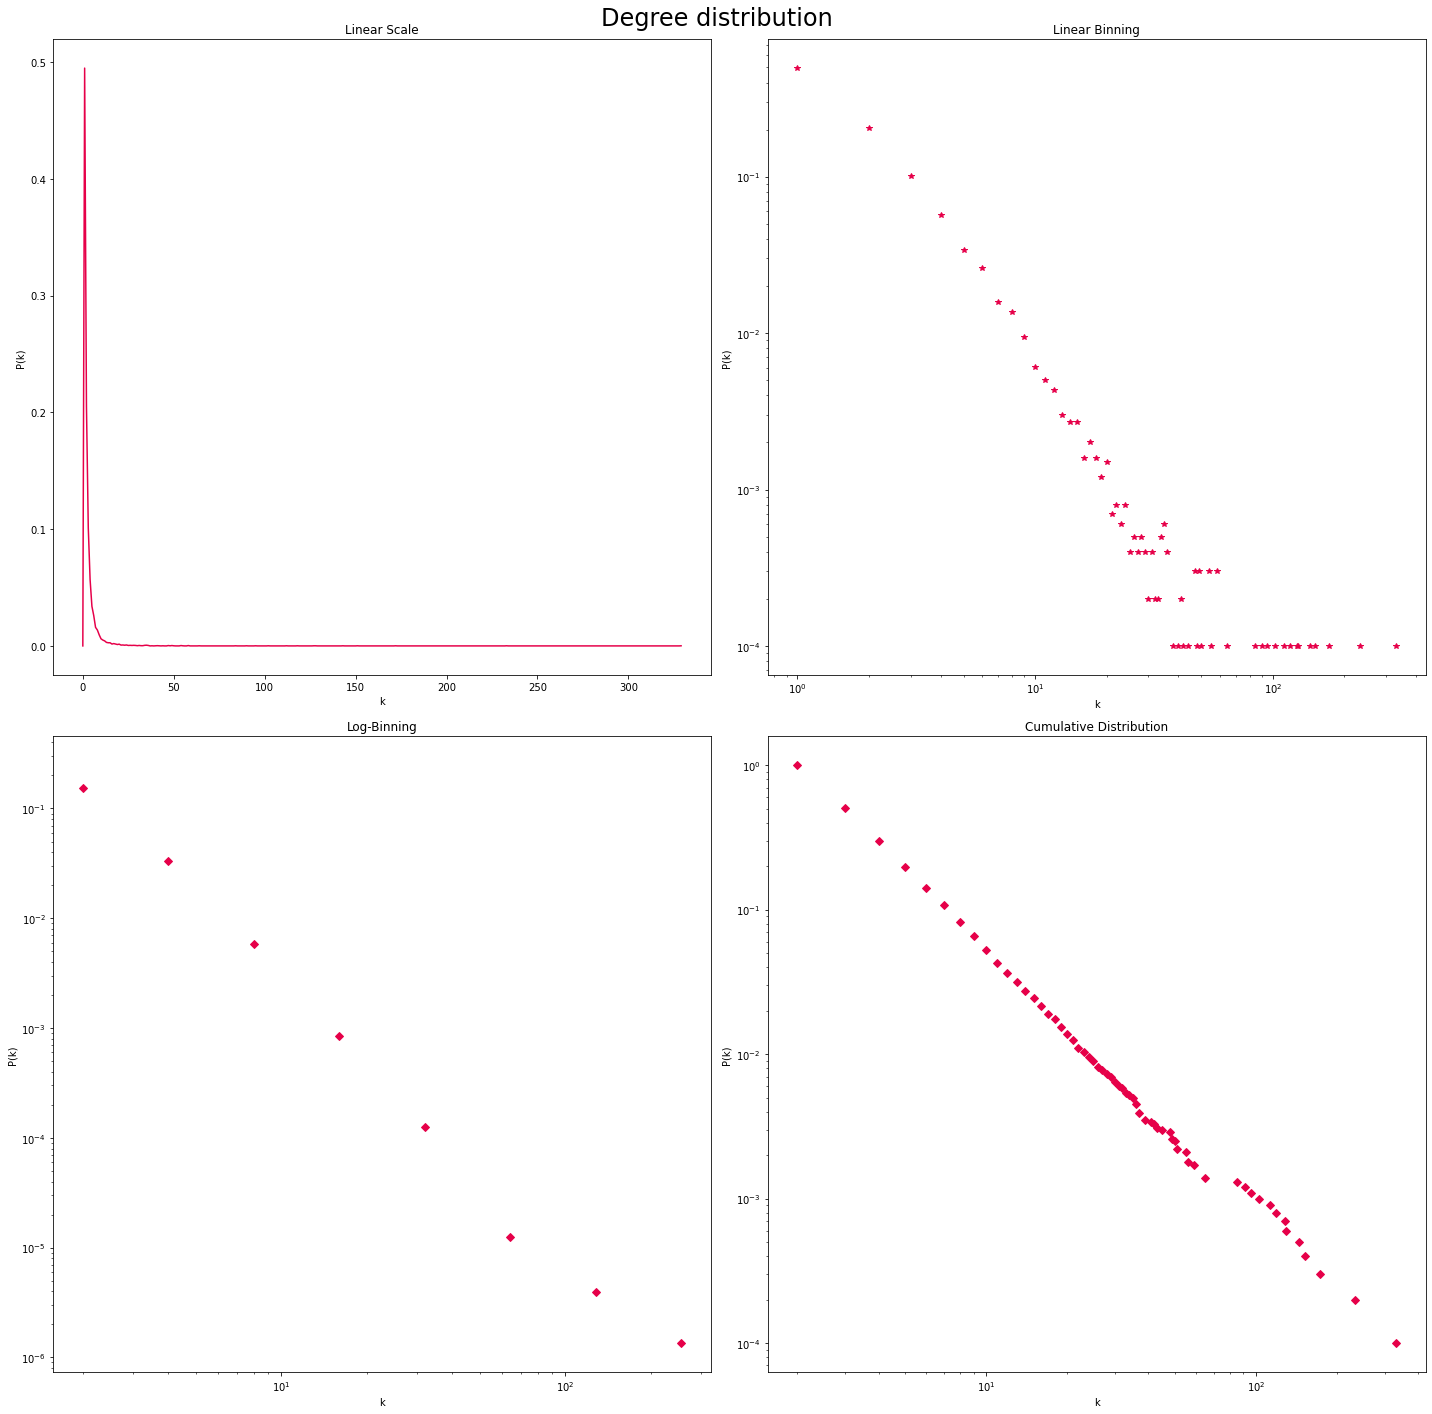

In [44]:
max_degree = max(user_network.degree())
print(max_degree)

# Crear una lista donde se almacena
degree_list = np.zeros(max_degree, dtype=int)

for node in user_network.vs():    
    degree_list[node.degree()-1] = (degree_list[node.degree()-1] + 1)

degree_list = degree_list / user_network.vcount()

plt.clf()
fig, axs = plt.subplots(2, 2, figsize=(20,20))

# LINEAR SCALE
axs[0, 0].set_title('Linear Scale')
axs[0, 0].plot(degree_list, color='#e60049')
axs[0, 0].set(ylabel='P(k)', xlabel='k')

# LINEAR BINNING
axs[0, 1].set_title('Linear Binning')
axs[0, 1].plot(range(max_degree), degree_list, color="#e60049", marker='*', ls='None')
axs[0, 1].loglog()
axs[0, 1].set(ylabel='P(k)', xlabel='k')

# LOG-BINNING
axs[1, 0].set_title('Log-Binning')
n_log_bin = ceil(log2(max(user_network.degree())))
x_values, y_values = calculate_log_binning(degree_list, n_log_bin)
axs[1, 0].plot(x_values, y_values, color='#e60049', marker="D", ls='None')
axs[1, 0].loglog()
axs[1, 0].set(ylabel='P(k)', xlabel='k')

# COMULATIVE
axs[1, 1].set_title("Cumulative Distribution")
degree_sequence = sorted([d for d in user_network.degree()], reverse=True)  # degree sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cs = np.cumsum(np.array(cnt)/user_network.vcount())
axs[1, 1].loglog(deg, cs, color='#e60049', marker="D", ls='None')
axs[1, 1].set(ylabel='P(k)', xlabel='k')

fig.suptitle("Degree distribution", fontsize=24)
fig.tight_layout()
plt.show()

In [45]:
user_network.write_graphml("scale-free.graphml")
#g.write("social_net.graphml", format="graphml")

## Generación de grafos

### Grafos por estructuras de datos Python

In [ ]:
### Desde una lista de diccionarios.

vertices = [{'name': 'apple'}, {'name': 'pear'}, {'name': 'peach'}]
edges = [{'source': 'apple', 'target': 'pear', 'weight': 1.2},
         {'source': 'apple', 'target': 'peach', 'weight': 0.9}]
g = ig.Graph.DictList(vertices, edges)

print(g)

### Desde matriz de adyacencia

In [ ]:
### Generar grafos desde matriz de adyacencia

matrix = [[0, 1, 1], [0, 0, 0], [0, 0, 1]]
g = ig.Graph.Adjacency(matrix)

print(g)

### Desde un archivo

In [ ]:
### Generar grafo desde un archivo

my_file = "Karate_club_from_gephi.graphml"
g = ig.Graph.Load(my_file, format="graphml")

#print(g)
print(g.summary())

### Desde bibliotecas externas

In [ ]:
### Generar un grafo desde networkX

import networkx as nx

my_file = "Karate_club_from_gephi.gml"
g_nx = nx.read_gml(my_file)
print("NetworkX graph information")
print(nx.info(g_nx))

# Converto from networkX to igraph
g_ig = ig.Graph.from_networkx(g_nx)
print("\nIgraph graph information")
print(g_ig.summary())

### Desde dataframe de pandas

In [ ]:
### Generar un grafo desde pandas dataframe

import pandas as pd

temp_var = [[0,1],[1,2],[3,4],[2,4]]
df = pd.DataFrame(temp_var)
df.columns = ["fuente", "destino"]
df

In [ ]:
g = ig.Graph.DataFrame(df, directed=False)
print(g)

### Funciones generadoras

In [ ]:
### Grafo completo

g = ig.Graph.Full(n=6)
print(g)
ig.plot(g, bbox=(200, 200))

In [ ]:
### Árbol

g = ig.Graph.Tree(n=10, children=2)
print(g)
ig.plot(g, bbox=(200, 200))

In [ ]:
### Estrella

g = ig.Graph.Star(n=6)
print(g)
ig.plot(g, bbox=(200, 200))

In [ ]:
### Lattice

g = ig.Graph.Lattice(dim=[5, 5], circular=False)

print(g.summary())
ig.plot(g, bbox=(200, 200))

In [ ]:
### Grafos famosos

g = ig.Graph.Famous("Zachary")

print(g.summary())
ig.plot(g, bbox=(200, 200))

In [ ]:
g = ig.Graph.Famous('Diamond')

print(g.summary())
ig.plot(g, bbox=(200, 200))

In [ ]:
### Grafos aleaorios

g = ig.Graph.Erdos_Renyi(n=15, p=0.2)

print(g.summary())
ig.plot(g, bbox=(200, 200))

In [ ]:
g = ig.Graph.Tree_Game(n=15)

print(g.summary())
ig.plot(g, bbox=(200, 200))

### Grafos desde cero

In [ ]:
### Grafo vacío

g = ig.Graph()

print(g.summary())

In [ ]:
# Grafo con 10 nodos y 2 aristas

g = ig.Graph(n=5, edges=[[0, 1], [0, 4]])

print(g)

In [ ]:
### Agregar nodos

g.add_vertex() # Agregar un sólo nodo

g.add_vertices(4) # Agregar 5 nodos

print(g)

In [ ]:
### Agregar aristas

g.add_edge(2, 7) # Agregar una única arista

g.add_edges([[3, 8], [4, 7], [8,1]]) # Agregar 3 aristas

print(g)

In [ ]:
### Error al crear aristas

g.add_edges([(10, 20)])

In [ ]:
### Eliminar nodos y aristas

g.delete_vertices([5, 9]) # Eliminar nodo con ID=5 y ID=9
g.delete_edges([(0,1),(3,7)]) # Eliminar aristas

print(g)

In [ ]:
### Mostrar la secuencia de nodos

list(g.vs())

In [ ]:
### Mostrar la secuencia de aristas

list(g.es())

## Manipulación y análisis

### Atributos

In [ ]:
# Grafo simple
g = ig.Graph([(0,1), (0,2), (2,3), (3,4), (4,2), (2,5), (5,0), (6,3), (5,6)])

g.vs["name"] = ["Alice", "Bob", "Clara", "Dennis", "Esther", "Frank", "George"]
g.vs["age"] = [25, 31, 18, 47, 22, 23, 50]
g.vs["class"] = ["C1", "C2", "C1", "C2", "C2", "C1", "C1"]
g.es["is_formal"] = [False, False, True, True, True, False, True, False, False]

print(g)
ig.plot(g, bbox=(200, 200))

In [ ]:
### Atributos del grafo

print("Atrs. de nodos: ",g.vs.attributes())
print("Atrs. de aristas: ",g.es.attributes())

In [ ]:
### Modificar un valor
print("Valores antes: ",g.es["is_formal"])

g.es[0]["is_formal"] = True

print("Valores después", g.es["is_formal"])

In [ ]:
### Modificar un subconjunto de valores

print("Valores antes: ",g.es["is_formal"])

g.es[4:]["is_formal"] = True

print("Valores después", g.es["is_formal"])

In [ ]:
# Eliminar atributos

g.vs[3]["grado"] = "MS"
print(g.vs["grado"])

In [ ]:
del g.vs["grado"] # Se elimina
print(g.vs["grado"])

### Propiedades

In [ ]:
g.vs["label"] = g.vs["name"]
ig.plot(g, bbox=(200, 200))

In [ ]:
### Mostrar los grados
print(g.vs["label"])
g.degree()

In [ ]:
### Grado de un sólo nodo
g.degree(3)

In [ ]:
### Grado de un subconjunto
g.degree([2,4,1])

In [ ]:
### Centralidad de betweenness

g.edge_betweenness() # Centralidad de intermediación ARISTAS

In [ ]:
g.betweenness() # Centralidad de intermediación NODOS

In [ ]:
### Algoritmo de detección comunidades

partition = g.community_multilevel()
partition.summary()


### Consulta de nodos y aristas por atributos

In [ ]:
### Personas con un grado mayor a 3

seleccion = g.vs.select(_degree_ge=3)
print(list(seleccion))
print(seleccion["name"])

In [ ]:
g.vs.select(_degree=g.maxdegree())["name"]

In [ ]:
### Seleccionar todas las personas en la clase C1

clase_c1 = g.vs.select(class_eq="C1")
print(list(clase_c1))

for item in clase_c1:
    print(item["name"], item["age"])

In [ ]:
### Seleccionar todas las personas con edad menor a 20

seleccion = g.vs.select(age_lt=25)
print(seleccion["name"])

In [ ]:
seleccion = g.es.select(is_formal=True)

for item in seleccion:
    print(g.vs[item.source]["name"], "-", g.vs[item.target]["name"])

### Encontrar nodos y aristas

In [ ]:
bob = g.vs.find(name="Bob")
type(bob)

In [ ]:
bob.attributes()

In [ ]:
bob.degree()

## Visualización de grafos

In [ ]:
### Tener un layout para la posición de los nodos

layout = g.layout("kamada_kawai") # Ambos tienen el mismo efecto
layout = g.layout_kamada_kawai()

In [ ]:
layout = g.layout("kk")
ig.plot(g, layout=layout, bbox=(300,300))

In [ ]:
g.vs["label"] = g.vs["name"]
color_dict = {"C1": "blue", "C2": "orange"}
g.vs["color"] = [color_dict[clase] for clase in g.vs["class"]]
ig.plot(g, layout=layout, bbox=(300, 300), margin=20)

In [ ]:
visual_style = {}
visual_style["vertex_size"] = 20
visual_style["vertex_color"] = [color_dict[clase] for clase in g.vs["class"]]
visual_style["vertex_label"] = g.vs["name"]
visual_style["edge_width"] = [1 + 4 * int(is_formal) for is_formal in g.es["is_formal"]]
visual_style["layout"] = layout
visual_style["bbox"] = (300, 300)
visual_style["margin"] = 20
ig.plot(g, **visual_style)

## Exportar grafos

In [ ]:
ig.plot(g, "social_network.pdf", **visual_style)

In [ ]:
g.write_graphml("social_net.graphml")
g.write("social_net.graphml", format="graphml")